In [233]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import scorecardpy as sc
import pprint

In [234]:
df_main = pd.read_csv('filtered_data_iter2.csv')
df = df_main.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114755 entries, 0 to 114754
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                114755 non-null  int64  
 1   STATUS                    114755 non-null  int64  
 2   NAME_CONTRACT_TYPE        114755 non-null  object 
 3   FLAG_OWN_CAR              114755 non-null  object 
 4   FLAG_OWN_REALTY           114755 non-null  object 
 5   AMT_INCOME_TOTAL          114755 non-null  float64
 6   AMT_CREDIT                114755 non-null  float64
 7   AMT_ANNUITY               114755 non-null  float64
 8   NAME_INCOME_TYPE          114755 non-null  object 
 9   NAME_EDUCATION_TYPE       114755 non-null  object 
 10  NAME_FAMILY_STATUS        114755 non-null  object 
 11  NAME_HOUSING_TYPE         114755 non-null  object 
 12  DAYS_EMPLOYED             114755 non-null  int64  
 13  OCCUPATION_TYPE           114755 non-null  o

In [235]:
#replace value 0 in status with 2
# df["STATUS"].replace(0,2,inplace=True)
# df["STATUS"].replace(1,0,inplace=True)
# df["STATUS"].replace(2,1,inplace=True)
df["STATUS"].value_counts()

0    104221
1     10534
Name: STATUS, dtype: int64

In [236]:
df.dropna(inplace=True)
df.isnull().sum()

Unnamed: 0                  0
STATUS                      0
NAME_CONTRACT_TYPE          0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
AMT_INCOME_TOTAL            0
AMT_CREDIT                  0
AMT_ANNUITY                 0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_EMPLOYED               0
OCCUPATION_TYPE             0
CNT_FAM_MEMBERS             0
EXT_SOURCE_2                0
DEF_60_CNT_SOCIAL_CIRCLE    0
age                         0
dtype: int64

In [237]:
data_dict = {}
for col in df.columns:
    data_dict[col] = [str(df[col].dtypes)]
    

# Manual Encoding so that the order is relevant

In [238]:
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].map({'Low-skill Laborers': 1, 'Cooking staff': 2, 'Cleaning staff': 3, 'Security staff': 4, 'Waiters/barmen staff': 5, 'Laborers': 6, 'Drivers': 7, 'Sales staff': 8, 'Realty agents': 9, 'Secretaries': 10, 'Not Specified': 11, 'Medicine staff': 12, 'Managers': 13, 'High skill tech staff': 14, 'HR staff': 15, 'Core staff': 16, 'Private service staff': 17, 'Accountants': 18, 'IT staff': 19})

# Education labels are in order of increasing education level
df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].map({'Lower secondary': 1, 'Secondary / secondary special': 2, 'Incomplete higher': 3, 'Higher education': 4, 'Academic degree': 5})

# Income labels are in order of increasing income level
df['NAME_INCOME_TYPE'] = df['NAME_INCOME_TYPE'].map({'Student': 1, 'Pensioner': 2, 'Working': 3, 'Commercial associate': 4, 'State servant': 5, 'Businessman': 6})

# Housing labels are in order of increasing loan burden on the individual
df['NAME_HOUSING_TYPE'] = df['NAME_HOUSING_TYPE'].map({'With parents': 1, 'Rented apartment': 2, 'Municipal apartment': 3, 'Office apartment': 4, 'Co-op apartment': 5, 'House / apartment': 6})

In [239]:
df.groupby('DAYS_EMPLOYED')['STATUS'].mean()

DAYS_EMPLOYED
-9136      0.0000
-9123      0.0000
-9112      0.0000
-9100      0.0000
-9039      0.0000
            ...  
-8         0.0000
-5         0.0000
-4         0.5000
 0         0.5000
 365243    0.1033
Name: STATUS, Length: 7976, dtype: float64

<AxesSubplot:>

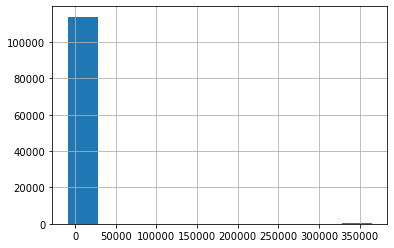

In [240]:
df['DAYS_EMPLOYED'].hist()

# We assume that those positives are outliers (data-entry), and we should take those values that are negative, and perform abs() function.

In [241]:
df.drop(df[df['DAYS_EMPLOYED'] > 0].index, inplace=True)

In [244]:
df.drop(df[df['DAYS_EMPLOYED'] == 0].index, inplace=True)

In [245]:
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].abs()

<AxesSubplot:>

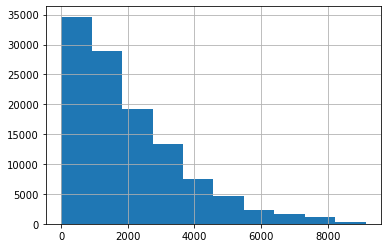

In [246]:
df['DAYS_EMPLOYED'].hist()

# Label encode the rest that is not manually set.

In [247]:
manual_encodings = ['OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'NAME_HOUSING_TYPE']

# define the target variable
target = df['STATUS']

# create a list of object columns
object_list = [col for col in df.columns if df[col].dtype == 'object']

# create a dictionary to store the original categorical variables and their encoded values
df_label_encoded = df.copy()
# label encode all object columns and store the original categorical variables and their encoded values
for col in (set(object_list) - set(manual_encodings)):
    print(col)
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# label encode the target variable and add it to the dictionary
le = LabelEncoder()
target = le.fit_transform(target)

FLAG_OWN_REALTY
NAME_CONTRACT_TYPE
FLAG_OWN_CAR
NAME_FAMILY_STATUS


In [131]:
del df['Unnamed: 0']

In [132]:
df.head()

,STATUS,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,EXT_SOURCE_2,DEF_60_CNT_SOCIAL_CIRCLE,age
0,0,0,1,1,171000.0,1560726.0,41301.0,5,4,1,6,-3130,18,3.0,0.724000,0.0,37.0
1,0,0,0,1,112500.0,652500.0,21177.0,3,4,1,6,-679,16,3.0,0.651862,0.0,27.0
2,0,0,0,1,67500.0,80865.0,5881.5,3,2,1,6,-2717,6,2.0,0.715042,0.0,36.0
3,0,0,1,0,225000.0,918468.0,28966.5,3,2,1,6,-3028,7,3.0,0.566907,0.0,38.0
4,0,0,0,0,108000.0,509602.5,26149.5,3,2,1,6,-1317,7,2.0,0.236378,0.0,35.0


# Dropping columns with terrible IVs

In [133]:
# automatically calculate bin ranges
# bins = sc.woebin(df, y='STATUS',positive="bad|0")
bins = sc.woebin(df, y='STATUS')
# make it easy to read the bins
for variables , bindetails in bins.items():
    print(variables , " : ")
    display(bindetails)
    print("--"*50)

[INFO] creating woe binning ...
Binning on 114564 rows and 17 columns in 00:00:11
DAYS_EMPLOYED  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_EMPLOYED,"[-inf,-4000.0)",14262,0.124489,13453,809,0.056724,-0.518680,0.027139,0.06496,-4000.0,False
1,DAYS_EMPLOYED,"[-4000.0,-1800.0)",36732,0.320624,33952,2780,0.075683,-0.210019,0.012981,0.06496,-1800.0,False
2,DAYS_EMPLOYED,"[-1800.0,-1000.0)",25152,0.219545,22629,2523,0.100310,0.098694,0.002226,0.06496,-1000.0,False
3,DAYS_EMPLOYED,"[-1000.0,inf)",38418,0.335341,34019,4399,0.114504,0.246936,0.022613,0.06496,inf,False


----------------------------------------------------------------------------------------------------
FLAG_OWN_CAR  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_OWN_CAR,"[-inf,1.0)",67448,0.588736,60551,6897,0.102257,0.120079,0.008915,0.023431,1.0,False
1,FLAG_OWN_CAR,"[1.0,inf)",47116,0.411264,43502,3614,0.076704,-0.195514,0.014516,0.023431,inf,False


----------------------------------------------------------------------------------------------------
NAME_CONTRACT_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_CONTRACT_TYPE,"[-inf,1.0)",103860,0.906568,93904,9956,0.09586,0.048380,0.002164,0.029617,1.0,False
1,NAME_CONTRACT_TYPE,"[1.0,inf)",10704,0.093432,10149,555,0.05185,-0.613684,0.027453,0.029617,inf,False


----------------------------------------------------------------------------------------------------
AMT_CREDIT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_CREDIT,"[-inf,150000.0)",6177,0.053917,5756,421,0.068156,-0.322887,0.004929,0.067077,150000.0,False
1,AMT_CREDIT,"[150000.0,300000.0)",26222,0.228885,23953,2269,0.086530,-0.064276,0.000921,0.067077,300000.0,False
2,AMT_CREDIT,"[300000.0,650000.0)",39699,0.346522,35029,4670,0.117635,0.277461,0.029869,0.067077,650000.0,False
3,AMT_CREDIT,"[650000.0,850000.0)",16348,0.142698,14927,1421,0.086922,-0.059333,0.000490,0.067077,850000.0,False
4,AMT_CREDIT,"[850000.0,1350000.0)",20145,0.175841,18698,1447,0.071829,-0.266446,0.011199,0.067077,1350000.0,False
5,AMT_CREDIT,"[1350000.0,inf)",5973,0.052137,5690,283,0.047380,-0.708541,0.019669,0.067077,inf,False


----------------------------------------------------------------------------------------------------
NAME_EDUCATION_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_EDUCATION_TYPE,"[-inf,4.0)",80017,0.698448,71454,8563,0.107015,0.170875,0.021866,0.089046,4.0,False
1,NAME_EDUCATION_TYPE,"[4.0,inf)",34547,0.301552,32599,1948,0.056387,-0.525000,0.067180,0.089046,inf,False


----------------------------------------------------------------------------------------------------
OCCUPATION_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,OCCUPATION_TYPE,"[-inf,5.0)",6718,0.058640,5835,883,0.131438,0.404174,0.011289,0.074947,5.0,False
1,OCCUPATION_TYPE,"[5.0,10.0)",49353,0.430790,43908,5445,0.110328,0.205079,0.019698,0.074947,10.0,False
2,OCCUPATION_TYPE,"[10.0,13.0)",23117,0.201782,21176,1941,0.083964,-0.097187,0.001832,0.074947,13.0,False
3,OCCUPATION_TYPE,"[13.0,inf)",35376,0.308788,33134,2242,0.063376,-0.400714,0.042128,0.074947,inf,False


----------------------------------------------------------------------------------------------------
NAME_INCOME_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_INCOME_TYPE,"[-inf,4.0)",72291,0.631010,64901,7390,0.102226,0.119743,0.009501,0.030883,4.0,False
1,NAME_INCOME_TYPE,"[4.0,5.0)",10068,0.087881,9430,638,0.063369,-0.400835,0.011996,0.030883,5.0,False
2,NAME_INCOME_TYPE,"[5.0,inf)",32205,0.281109,29722,2483,0.077100,-0.189942,0.009386,0.030883,inf,False


----------------------------------------------------------------------------------------------------
FLAG_OWN_REALTY  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_OWN_REALTY,"[-inf,1.0)",41009,0.357957,37256,3753,0.091516,-0.002779,0.000003,0.000004,1.0,False
1,FLAG_OWN_REALTY,"[1.0,inf)",73555,0.642043,66797,6758,0.091877,0.001547,0.000002,0.000004,inf,False


----------------------------------------------------------------------------------------------------
NAME_HOUSING_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_HOUSING_TYPE,"[-inf,3.0)",10326,0.090133,9125,1201,0.116308,0.264615,0.007030,0.007815,3.0,False
1,NAME_HOUSING_TYPE,"[3.0,inf)",104238,0.909867,94928,9310,0.089315,-0.029552,0.000785,0.007815,inf,False


----------------------------------------------------------------------------------------------------
AMT_INCOME_TOTAL  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_INCOME_TOTAL,"[-inf,170000.0)",64065,0.559207,57661,6404,0.099961,0.094820,0.005226,0.021284,170000.0,False
1,AMT_INCOME_TOTAL,"[170000.0,220000.0)",21151,0.184622,19194,1957,0.092525,0.009293,0.000016,0.021284,220000.0,False
2,AMT_INCOME_TOTAL,"[220000.0,340000.0)",23182,0.202350,21409,1773,0.076482,-0.198660,0.007364,0.021284,340000.0,False
3,AMT_INCOME_TOTAL,"[340000.0,inf)",6166,0.053821,5789,377,0.061142,-0.438992,0.008678,0.021284,inf,False


----------------------------------------------------------------------------------------------------
NAME_FAMILY_STATUS  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_FAMILY_STATUS,"[-inf,1.0)",12185,0.106360,10877,1308,0.107345,0.174327,0.003470,0.009239,1.0,False
1,NAME_FAMILY_STATUS,"[1.0,2.0)",78550,0.685643,71755,6795,0.086505,-0.064592,0.002786,0.009239,2.0,False
2,NAME_FAMILY_STATUS,"[2.0,3.0)",6580,0.057435,5961,619,0.094073,0.027590,0.000044,0.009239,3.0,False
3,NAME_FAMILY_STATUS,"[3.0,inf)",17249,0.150562,15460,1789,0.103716,0.135879,0.002938,0.009239,inf,False


----------------------------------------------------------------------------------------------------
DEF_60_CNT_SOCIAL_CIRCLE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DEF_60_CNT_SOCIAL_CIRCLE,"[-inf,1.0)",104874,0.915418,95565,9309,0.088764,-0.036347,0.001192,0.012266,1.0,False
1,DEF_60_CNT_SOCIAL_CIRCLE,"[1.0,inf)",9690,0.084582,8488,1202,0.124045,0.337811,0.011074,0.012266,inf,False


----------------------------------------------------------------------------------------------------
AMT_ANNUITY  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_ANNUITY,"[-inf,14000.0)",19409,0.169416,17979,1430,0.073677,-0.239052,8.782527e-03,0.032036,14000.0,False
1,AMT_ANNUITY,"[14000.0,36000.0)",67860,0.592333,60889,6971,0.102726,0.125184,9.769004e-03,0.032036,36000.0,False
2,AMT_ANNUITY,"[36000.0,42000.0)",10646,0.092926,9668,978,0.091865,0.001411,1.851115e-07,0.032036,42000.0,False
3,AMT_ANNUITY,"[42000.0,inf)",16649,0.145325,15517,1132,0.067992,-0.325472,1.348406e-02,0.032036,inf,False


----------------------------------------------------------------------------------------------------
CNT_FAM_MEMBERS  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,CNT_FAM_MEMBERS,"[-inf,2.0)",15571,0.135915,13972,1599,0.102691,0.124801,0.002228,0.005076,2.0,False
1,CNT_FAM_MEMBERS,"[2.0,3.0)",45360,0.395936,41060,4300,0.094797,0.036059,0.000522,0.005076,3.0,False
2,CNT_FAM_MEMBERS,"[3.0,4.0)",32181,0.280900,29398,2783,0.086480,-0.064919,0.001153,0.005076,4.0,False
3,CNT_FAM_MEMBERS,"[4.0,inf)",21452,0.187249,19623,1829,0.085260,-0.080455,0.001173,0.005076,inf,False


----------------------------------------------------------------------------------------------------
EXT_SOURCE_2  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,EXT_SOURCE_2,"[-inf,0.16)",7373,0.064357,5638,1735,0.235318,1.113956,0.123517,0.303694,0.16,False
1,EXT_SOURCE_2,"[0.16,0.44)",27167,0.237134,23610,3557,0.130931,0.399725,0.044571,0.303694,0.44,False
2,EXT_SOURCE_2,"[0.44,0.66)",51666,0.450979,47684,3982,0.077072,-0.190334,0.015117,0.303694,0.66,False
3,EXT_SOURCE_2,"[0.66,0.72)",17372,0.151636,16508,864,0.049735,-0.657550,0.050270,0.303694,0.72,False
4,EXT_SOURCE_2,"[0.72,inf)",10986,0.095894,10613,373,0.033952,-1.055778,0.070219,0.303694,inf,False


----------------------------------------------------------------------------------------------------
age  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,age,"[-inf,32.0)",34162,0.298191,30533,3629,0.106229,0.162627,0.008427,0.01892,32.0,False
1,age,"[32.0,37.0)",34633,0.302303,31382,3251,0.093870,0.025206,0.000194,0.01892,37.0,False
2,age,"[37.0,40.0)",23321,0.203563,21392,1929,0.082715,-0.113537,0.002505,0.01892,40.0,False
3,age,"[40.0,inf)",22448,0.195943,20746,1702,0.075820,-0.208071,0.007793,0.01892,inf,False


----------------------------------------------------------------------------------------------------


In [134]:
df.drop("FLAG_OWN_REALTY",axis=1,inplace=True) #0.000004
# df.drop("CNT_FAM_MEMBERS", axis=1, inplace=True) #0.005

In [135]:
len(df.columns)
print(df.columns) #exlucing status, we have 15 characteristics

Index(['STATUS', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_EMPLOYED',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'age'],
      dtype='object')


In [136]:
print(df.shape)
df.head()

(114564, 16)


,STATUS,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,EXT_SOURCE_2,DEF_60_CNT_SOCIAL_CIRCLE,age
0,0,0,1,171000.0,1560726.0,41301.0,5,4,1,6,-3130,18,3.0,0.724000,0.0,37.0
1,0,0,0,112500.0,652500.0,21177.0,3,4,1,6,-679,16,3.0,0.651862,0.0,27.0
2,0,0,0,67500.0,80865.0,5881.5,3,2,1,6,-2717,6,2.0,0.715042,0.0,36.0
3,0,0,1,225000.0,918468.0,28966.5,3,2,1,6,-3028,7,3.0,0.566907,0.0,38.0
4,0,0,0,108000.0,509602.5,26149.5,3,2,1,6,-1317,7,2.0,0.236378,0.0,35.0


# Adjust NAME_HOUSING_TYPE

In [137]:
df["NAME_HOUSING_TYPE"].value_counts().sort_index()

1     7889
2     2437
3     3815
4     1199
5      516
6    98708
Name: NAME_HOUSING_TYPE, dtype: int64

[INFO] creating woe binning ...
Binning on 114564 rows and 16 columns in 00:00:10


{'NAME_HOUSING_TYPE': <Figure size 432x288 with 2 Axes>}

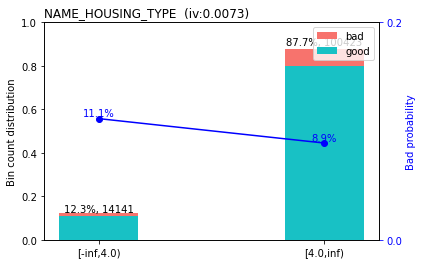

In [138]:
#adjust the bins
breaks_adj = {'NAME_HOUSING_TYPE' : [4]}
bins0 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins0['NAME_HOUSING_TYPE'])

# Adjust Occupation Type

In [23]:
df["OCCUPATION_TYPE"].value_counts().sort_index()

1       923
2      2459
3      1179
4      2157
5       586
6     25203
7      8063
8     15099
9       402
10      651
11    18883
12     3583
13     9875
14     5159
15      279
16    13653
17     1300
18     4800
19      310
Name: OCCUPATION_TYPE, dtype: int64

[INFO] creating woe binning ...
Binning on 114564 rows and 16 columns in 00:00:11


{'OCCUPATION_TYPE': <Figure size 432x288 with 2 Axes>}

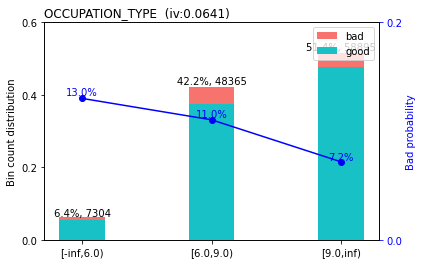

In [140]:
#adjust the bins
breaks_adj = {'OCCUPATION_TYPE' : [1,  6, 9]}
# bins2 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
bins2 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins2['OCCUPATION_TYPE'])

# Adjust name income type

In [141]:
df["NAME_INCOME_TYPE"].value_counts().sort_index()

1        6
2      698
3    71587
4    10068
5    32204
6        1
Name: NAME_INCOME_TYPE, dtype: int64

[INFO] creating woe binning ...
Binning on 114564 rows and 18 columns in 00:00:12


{'NAME_INCOME_TYPE': <Figure size 432x288 with 2 Axes>}

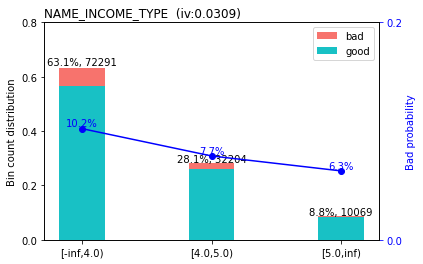

In [173]:
#adjust the bins
breaks_adj = {'NAME_INCOME_TYPE' : [4,5]}
# bins3 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
bins3 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins3['NAME_INCOME_TYPE'])

# Adjust name education type

In [143]:
df["NAME_EDUCATION_TYPE"].value_counts().sort_index()

1     1184
2    74076
3     4757
4    34483
5       64
Name: NAME_EDUCATION_TYPE, dtype: int64

[INFO] creating woe binning ...
Binning on 114564 rows and 18 columns in 00:00:12


{'NAME_EDUCATION_TYPE': <Figure size 432x288 with 2 Axes>}

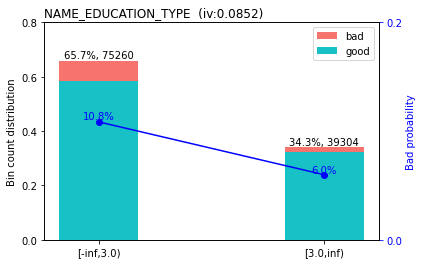

In [178]:
#adjust the bins
breaks_adj = {'NAME_EDUCATION_TYPE' : [3]}
# bins4 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
bins4 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins4['NAME_EDUCATION_TYPE'])

# Adjust amt income total

In [ ]:
df["AMT_INCOME_TOTAL"].value_counts().sort_index()

26550.0         1
27000.0        15
27900.0         2
28723.5         1
29250.0         4
               ..
3375000.0       1
3600000.0       2
3950059.5       1
4500000.0       1
117000000.0     1
Name: AMT_INCOME_TOTAL, Length: 1172, dtype: int64

[INFO] creating woe binning ...
Binning on 114564 rows and 18 columns in 00:00:12


{'AMT_INCOME_TOTAL': <Figure size 432x288 with 2 Axes>}

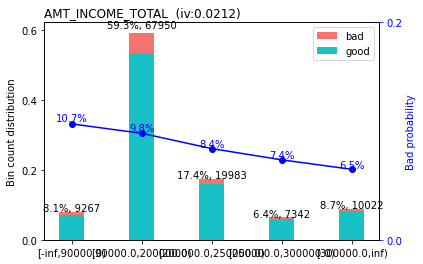

In [190]:
#adjust the bins
breaks_adj = {'AMT_INCOME_TOTAL' : [90000,200000,250000, 300000]}
# bins5 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
bins5 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins5['AMT_INCOME_TOTAL'])

# Adjust days employed

In [248]:
df["DAYS_EMPLOYED"].value_counts().sort_index()

4       2
5       1
8       1
9       2
12      1
       ..
9039    1
9100    1
9112    1
9123    1
9136    1
Name: DAYS_EMPLOYED, Length: 7974, dtype: int64

[INFO] creating woe binning ...
Binning on 113865 rows and 18 columns in 00:00:12


{'DAYS_EMPLOYED': <Figure size 432x288 with 2 Axes>}

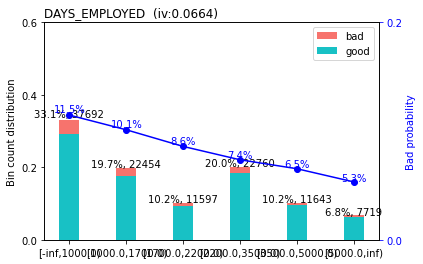

In [249]:
#adjust the bins
breaks_adj = {'DAYS_EMPLOYED' : [1000,1700,2200,3500,5000]}
# bins6 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
bins6 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins6['DAYS_EMPLOYED'])

# Adjust amt annuity

In [ ]:
df["AMT_ANNUITY"].value_counts().sort_index()

0.0          5
2187.0       1
2205.0       1
2754.0       1
2781.0       2
            ..
213291.0     3
215500.5     1
220297.5     1
225000.0    10
258025.5     1
Name: AMT_ANNUITY, Length: 10881, dtype: int64

[INFO] creating woe binning ...
Binning on 114564 rows and 18 columns in 00:00:12


{'AMT_ANNUITY': <Figure size 432x288 with 2 Axes>}

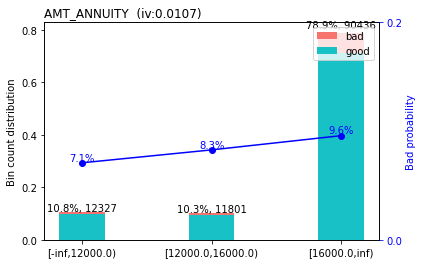

In [193]:
#adjust the bins
breaks_adj = {'AMT_ANNUITY' : [12000, 16000]}
# bins7 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
bins7 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins7['AMT_ANNUITY'])

# Adjust ext source 2

In [ ]:
df["EXT_SOURCE_2"].value_counts().sort_index()

0.000001    1
0.000006    1
0.000010    1
0.000017    1
0.000017    1
           ..
0.816462    1
0.816504    1
0.817873    1
0.821714    1
0.855000    9
Name: EXT_SOURCE_2, Length: 72580, dtype: int64

[INFO] creating woe binning ...
Binning on 114564 rows and 18 columns in 00:00:11


{'EXT_SOURCE_2': <Figure size 432x288 with 2 Axes>}

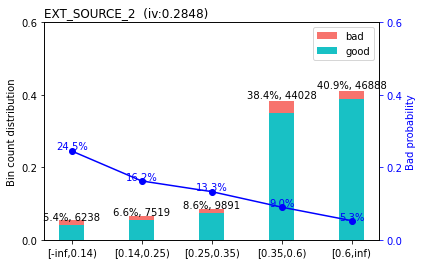

In [212]:
#adjust the bins
breaks_adj = {'EXT_SOURCE_2' : [0.14,0.25,0.35,0.6]}
# bins8 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
bins8 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins8['EXT_SOURCE_2'])

# Adjusting amt_credit

In [ ]:
df["AMT_CREDIT"].value_counts().sort_index()

45000.0      79
47970.0      60
48519.0       1
49455.0       4
49500.0      15
             ..
3312162.0     1
3375000.0     3
3600000.0     2
3860019.0     1
4050000.0     5
Name: AMT_CREDIT, Length: 4124, dtype: int64

[INFO] creating woe binning ...
Binning on 114564 rows and 18 columns in 00:00:12


{'AMT_CREDIT': <Figure size 432x288 with 2 Axes>}

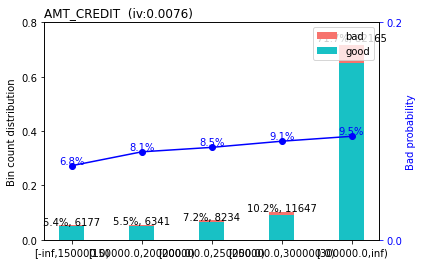

In [217]:
#adjust the bins
breaks_adj = {'AMT_CREDIT' : [150000,200000,250000, 300000]}
# bins9 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
bins9 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins9['AMT_CREDIT'])

# Adjust CNT_FAM_MEMBERS

In [ ]:
df["CNT_FAM_MEMBERS"].value_counts().sort_index()

1.0     15571
2.0     45360
3.0     32181
4.0     18466
5.0      2639
6.0       270
7.0        54
8.0        11
9.0         2
10.0        3
11.0        1
12.0        1
14.0        2
16.0        1
20.0        2
Name: CNT_FAM_MEMBERS, dtype: int64

[INFO] creating woe binning ...


{'CNT_FAM_MEMBERS': <Figure size 432x288 with 2 Axes>}

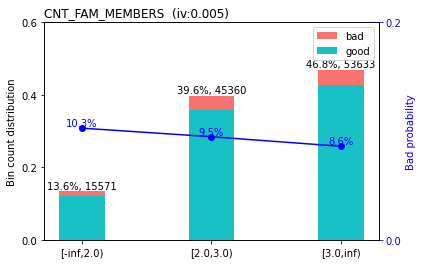

In [ ]:
#adjust the bins
breaks_adj = {'CNT_FAM_MEMBERS' : [1,2,3]}
# bins10 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
bins10 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins10['CNT_FAM_MEMBERS'])

# ADJ NAME_FAMILY_STATUS

In [ ]:
df["NAME_FAMILY_STATUS"].value_counts().sort_index()

0    12185
1    78550
2     6580
3    16340
4      909
Name: NAME_FAMILY_STATUS, dtype: int64

[INFO] creating woe binning ...


{'NAME_FAMILY_STATUS': <Figure size 432x288 with 2 Axes>}

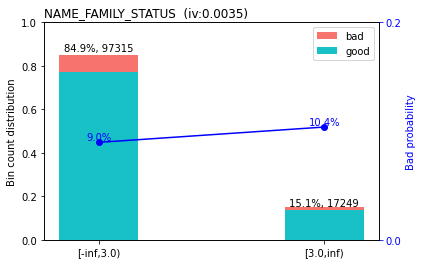

In [ ]:
#adjust the bins
breaks_adj = {'NAME_FAMILY_STATUS' : [0,3]}
# bins11 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
bins11 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins11['NAME_FAMILY_STATUS'])

# Adjust AGE

In [ ]:
df["age"].value_counts().sort_index()

27.0    7061
28.0    6700
29.0    6491
30.0    6636
31.0    7274
32.0    6833
33.0    6789
34.0    6675
35.0    6824
36.0    7512
37.0    7779
38.0    7860
39.0    7682
40.0    7677
41.0    7500
42.0    7271
Name: age, dtype: int64

[INFO] creating woe binning ...


{'age': <Figure size 432x288 with 2 Axes>}

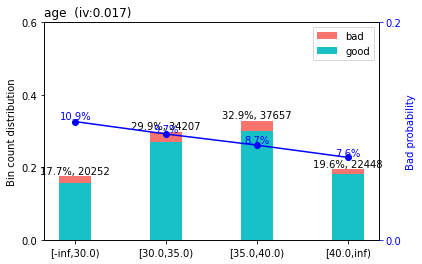

In [ ]:
#adjust the bins
breaks_adj = {'age' : [27, 30,35, 40]}
# bins12 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
bins12 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins12['age'])

# Adj Name_contract_type

In [ ]:
df["NAME_CONTRACT_TYPE"].value_counts().sort_index()

0    103860
1     10704
Name: NAME_CONTRACT_TYPE, dtype: int64

[INFO] creating woe binning ...


{'NAME_CONTRACT_TYPE': <Figure size 432x288 with 2 Axes>}

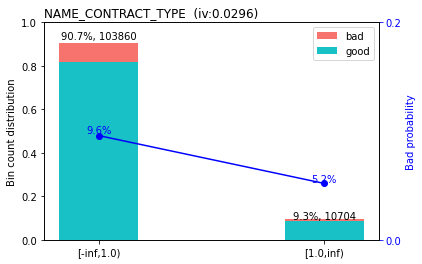

In [ ]:
#adjust the bins
breaks_adj = {'NAME_CONTRACT_TYPE' : [0,1]}
# bins13 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
bins13 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins13['NAME_CONTRACT_TYPE'])

# Adjust DEF_60_CNT_SOCIAL_CIRCLE

In [ ]:
df["DEF_60_CNT_SOCIAL_CIRCLE"].value_counts().sort_index()

0.0     104874
1.0       8268
2.0       1154
3.0        222
4.0         39
5.0          5
6.0          1
24.0         1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

[INFO] creating woe binning ...
Binning on 114564 rows and 18 columns in 00:00:12


{'DEF_60_CNT_SOCIAL_CIRCLE': <Figure size 432x288 with 2 Axes>}

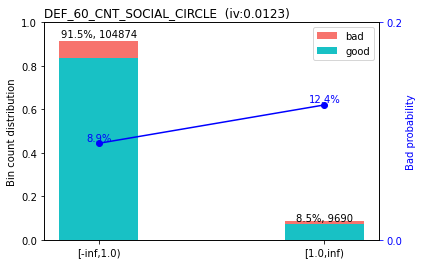

In [218]:
#adjust the bins
breaks_adj = {'DEF_60_CNT_SOCIAL_CIRCLE' : [0,1]}
# bins14 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
bins14 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins14['DEF_60_CNT_SOCIAL_CIRCLE'])

# Adjust flag_own_car

In [ ]:
df["FLAG_OWN_CAR"].value_counts().sort_index()

0    67448
1    47116
Name: FLAG_OWN_CAR, dtype: int64

[INFO] creating woe binning ...


{'FLAG_OWN_CAR': <Figure size 432x288 with 2 Axes>}

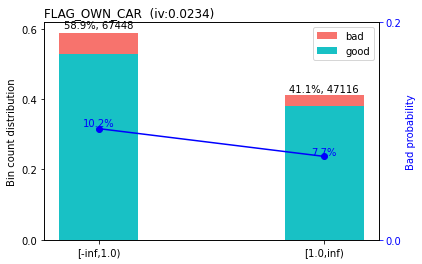

In [ ]:
#adjust the bins
breaks_adj = {'FLAG_OWN_CAR' : [0,1]}
# bins15 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
bins15 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins15['FLAG_OWN_CAR'])

# Select best bins

In [250]:
breaks_adj = {
       'OCCUPATION_TYPE' : [1,  6, 9],
    'NAME_HOUSING_TYPE': [4],
       'NAME_INCOME_TYPE' : [4,5],
        'NAME_EDUCATION_TYPE' : [3],
        'AMT_INCOME_TOTAL' : [90000,200000,250000, 300000],
    'DAYS_EMPLOYED' : [1000,1700,2200,3500,5000],
        'AMT_ANNUITY' : [12000, 16000],
        'EXT_SOURCE_2' : [0.14,0.25,0.35,0.6],
        'AMT_CREDIT' : [150000,200000,250000, 300000],
        'CNT_FAM_MEMBERS' : [1,2,3],
        'NAME_FAMILY_STATUS' : [0,3],
        'age' : [27, 30,35, 40],
        'DEF_60_CNT_SOCIAL_CIRCLE' : [0,1],
        'FLAG_OWN_CAR': [0,1]
    }
bins_final = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
# bins_final = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")

[INFO] creating woe binning ...
